# Classify rivers

Combined river classification:
1. Glaciers
2. Continental
3. Other

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pickle
import numpy as np
import netCDF4 as nc
import datetime
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import matplotlib

In [6]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+\
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2015.nc','r')
lon_rf = np.array(c.variables['nav_lon'])
lat_rf = np.array(c.variables['nav_lat'])
rf     = np.array(c.variables['runoff'][8])

In [7]:
rf[rf == 0]       = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

In [8]:
ncd         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class_201912.nc')
river_class = np.array(ncd.variables['rclass'])

In [9]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])
land_mask = np.ma.masked_where((tmask[0,:,:,:] > 0.1), tmask[0,:,:,:]) 

In [10]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

<IPython.core.display.Javascript object>


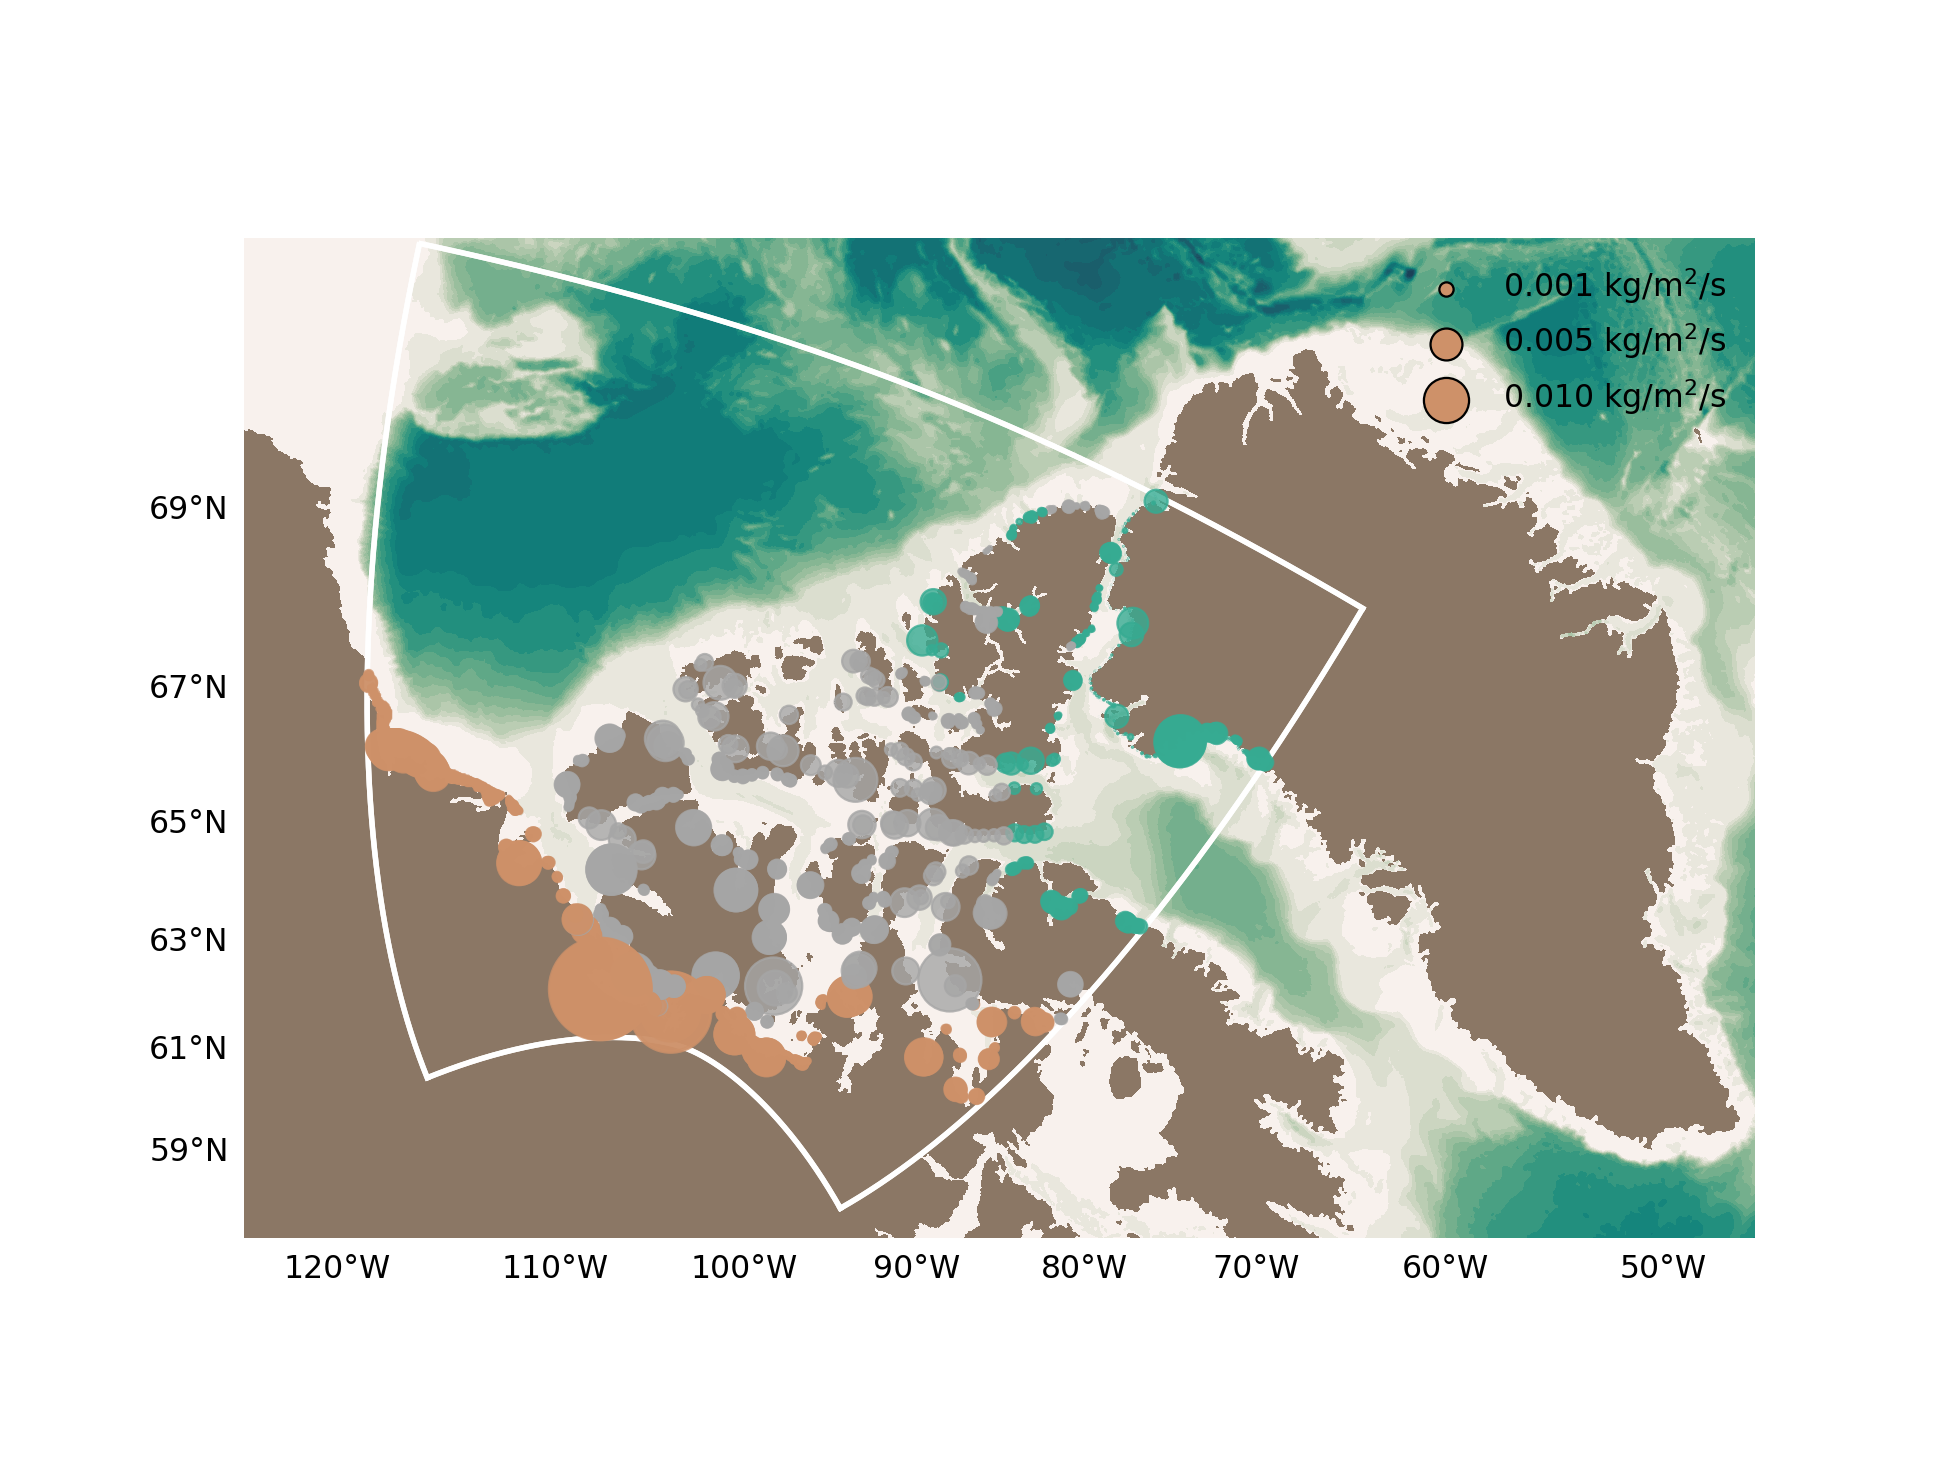

In [20]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(lon, lat) 
x_rf,    y_rf = proj1(lon_rf, lat_rf)

proj1.plot(x_sub[1480:2180,799],   y_sub[1480:2180,799],   'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[1480:2180,799].T, y_sub[1480:2180,799].T, 'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[1480:2180,160],   y_sub[1480:2180,160],   'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[1480:2180,160].T, y_sub[1480:2180,160].T, 'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[1480,160:799],    y_sub[1480,160:799],    'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[1480,160:799].T,  y_sub[1480,160:799].T,  'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[2180,160:799],    y_sub[2180,160:799],    'w-', lw=2.4,zorder=2)
proj1.plot(x_sub[2180,160:799].T,  y_sub[2180,160:799].T,  'w-', lw=2.4,zorder=2)

# # flux boundaries:
# proj1.plot(x_sub[1935,450:530],  y_sub[1935,450:530],  '--k', dashes=(1.5, 0.8), lw=4.5, zorder=5)
# proj1.plot(x_sub[1635:1653,760], y_sub[1635:1653,760], '--k', dashes=(1.3, 0.4), lw=4.5, zorder=5)
# proj1.plot(x_sub[1520,505:673],  y_sub[1520,505:673],  '--k', dashes=(1.1, 0.8), lw=3.5, zorder=2)
# proj1.plot(x_sub[1570:1630,635], y_sub[1570:1630,635], '--k', dashes=(1.1, 0.8), lw=3.5, zorder=2)
# proj1.plot(x_sub[1585,485:538],  y_sub[1585,485:538],  '--k', dashes=(1.1, 0.8), lw=3.5, zorder=2)

colormap = colors.ListedColormap(['#36ab92', '#ce9169', '#a6a6a6'])
proj1.scatter(x_rf[1480:2180, 160:800], y_rf[1480:2180, 160:800], c=river_class[1480:2180, 160:800],\
              s=rf[1480:2180, 160:800]*4e4, alpha=0.8, cmap=colormap, zorder=3)

for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c='#ce9169', alpha=1, s=float(a)*4e4, label=a + ' kg/m$^2$/s', edgecolors='k', zorder=4)

ax1.legend(scatterpoints=1, frameon=False, labelspacing=0.5, fontsize=14, loc=1)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


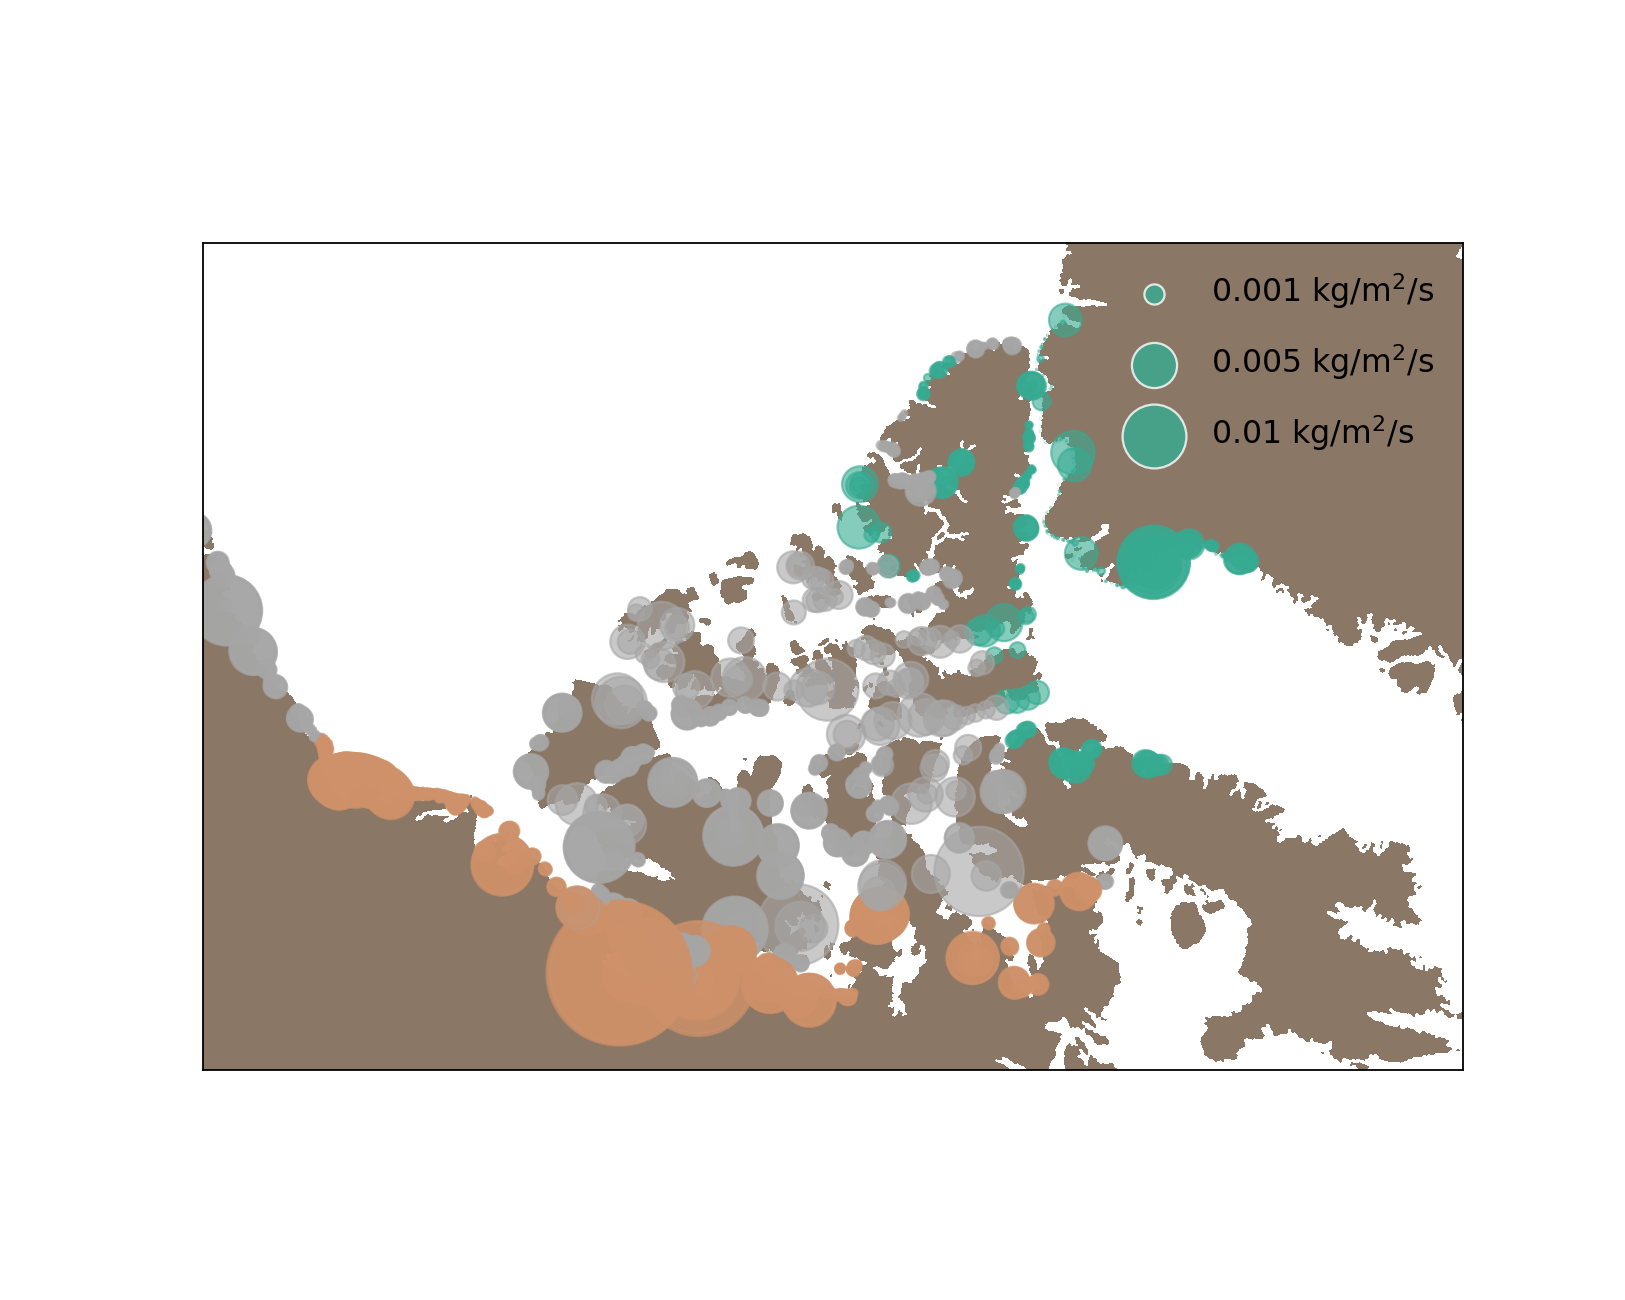

In [43]:
fig, ax1 = plt.subplots(figsize=(10,8))

proj1 = Basemap(projection='eqdc',lat_0 = 76.3, lon_0 = -100, resolution='i', width=3.5e6, height=2.3e6, ax=ax1)
x_model, y_model = proj1(lon, lat)
x_rf,    y_rf    = proj1(lon_rf, lat_rf)
proj1.contourf(x_model, y_model, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))


colormap = colors.ListedColormap(['#36ab92', '#ce9169', '#a6a6a6'])
proj1.scatter(x_rf[1480:2250, 160:800], y_rf[1480:2250, 160:800], c=class_river[1480:2250, 160:800],\
              s=rf[1480:2250, 160:800]*8e4, alpha=0.6, cmap=colormap)

for a in [0.001, 0.005, 0.010]:
    proj1.scatter([], [], c='#36ab92', alpha=0.8, s=a*8e4,
                label=str(a) + ' kg/m$^2$/s', edgecolors='w')
ax1.legend(scatterpoints=1, frameon=False, labelspacing=1, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/river-classification.png', bbox_inches='tight', dpi=300)